___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
# lo de arriba se modifica como gustes,el shape son los datosqu tenemos
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador,  gradiente descendente, crossentropy 
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 2s 9ms/step - loss: 0.7170 - accuracy: 0.5326
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.7085 - accuracy: 0.5400
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 0.7004 - accuracy: 0.5475
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5549
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6854 - accuracy: 0.5568
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6782 - accuracy: 0.5698
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6715 - accuracy: 0.5829
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6651 - accuracy: 0.5903
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6590 - accuracy: 0.6052
Epoch 10/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6528 - accuracy: 0.6108
Epoch 11/200
6/6 [==========

6/6 [==============================] - 0s 5ms/step - loss: 0.4883 - accuracy: 0.7635
Epoch 85/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4876 - accuracy: 0.7635
Epoch 86/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4869 - accuracy: 0.7635
Epoch 87/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4863 - accuracy: 0.7654
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4857 - accuracy: 0.7654
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4851 - accuracy: 0.7654
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4845 - accuracy: 0.7635
Epoch 91/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.7672
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.7691
Epoch 93/200
6/6 [==============================] - 0s 9ms/step - loss: 0.4828 - accuracy: 0.7691
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.4612 - accuracy: 0.7784
Epoch 168/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4610 - accuracy: 0.7784
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4609 - accuracy: 0.7784
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4607 - accuracy: 0.7784
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4606 - accuracy: 0.7784
Epoch 172/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4605 - accuracy: 0.7784
Epoch 173/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4604 - accuracy: 0.7784
Epoch 174/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4602 - accuracy: 0.7784
Epoch 175/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.7784
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4600 - accuracy: 0.7784
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

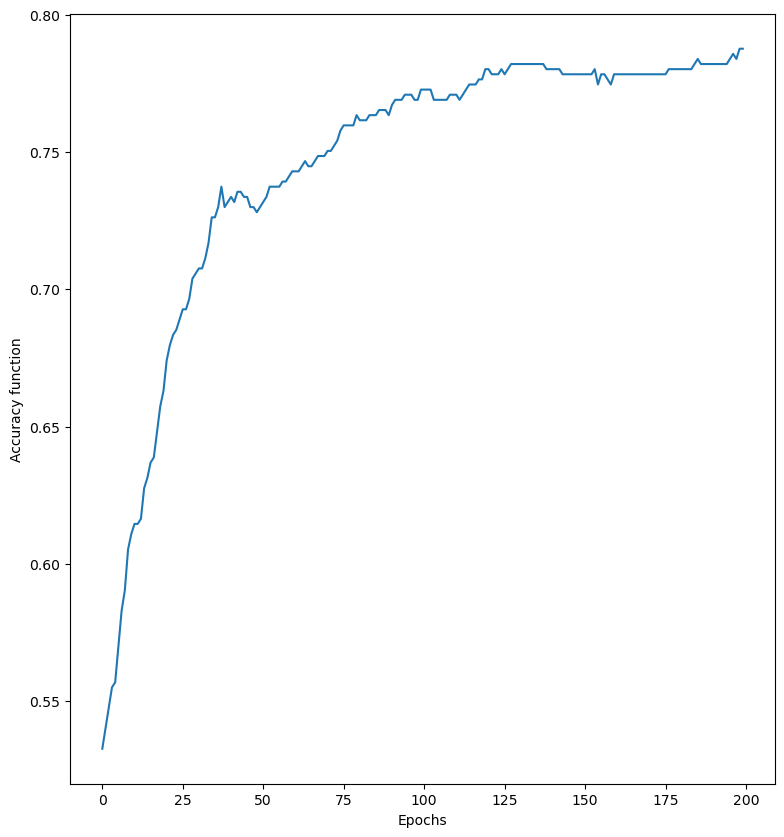

In [8]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 4ms/step


In [10]:
Y_pred

array([[0.2708681 ],
       [0.172857  ],
       [0.11887724],
       [0.19275284],
       [0.5558633 ],
       [0.47848615],
       [0.04132243],
       [0.6281029 ],
       [0.5984222 ],
       [0.82364535],
       [0.20293859],
       [0.8703565 ],
       [0.36593884],
       [0.36040553],
       [0.08772609],
       [0.42826402],
       [0.14286119],
       [0.07593037],
       [0.68672067],
       [0.6098488 ],
       [0.21614712],
       [0.09669999],
       [0.4276187 ],
       [0.08380623],
       [0.5118517 ],
       [0.8749655 ],
       [0.10272563],
       [0.05055417],
       [0.33036947],
       [0.11578663],
       [0.7960528 ],
       [0.88112324],
       [0.752149  ],
       [0.75739205],
       [0.7624306 ],
       [0.7046141 ],
       [0.7554404 ],
       [0.28395048],
       [0.46622235],
       [0.70173246],
       [0.06728525],
       [0.69306886],
       [0.6059708 ],
       [0.31493744],
       [0.07725769],
       [0.61156994],
       [0.6564572 ],
       [0.187

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 3ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.788 	 0.734 	 0.617
  Test 	 0.740 	 0.625 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [14]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [28]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = np_utils.to_categorical(Y).astype(int)

In [32]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [33]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [34]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,))) # el primer 8 son las neuronas
model.add(Dense(3, activation='softmax')) # aqui el 3 es necesario cambiar a las clases que se tienen

#Gradiente descendente
learning_rate=0.1   # podemos juagr con esto y el momentum para que no haya tanto pico
epochs = 200   
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 1s 401ms/step - loss: 4.0463 - accuracy: 0.3250 - val_loss: 1.0223 - val_accuracy: 0.4000
Epoch 2/200
2/2 [==============================] - 0s 59ms/step - loss: 1.0194 - accuracy: 0.5333 - val_loss: 0.8213 - val_accuracy: 0.7000
Epoch 3/200
2/2 [==============================] - 0s 60ms/step - loss: 0.8522 - accuracy: 0.6750 - val_loss: 0.7513 - val_accuracy: 0.9667
Epoch 4/200
2/2 [==============================] - 0s 66ms/step - loss: 0.7600 - accuracy: 0.9417 - val_loss: 0.6382 - val_accuracy: 0.8000
Epoch 5/200
2/2 [==============================] - 0s 91ms/step - loss: 0.6535 - accuracy: 0.8667 - val_loss: 0.6335 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 106ms/step - loss: 0.6280 - accuracy: 0.8500 - val_loss: 0.5566 - val_accuracy: 0.8333
Epoch 7/200
2/2 [==============================] - 0s 94ms/step - loss: 0.5712 - accuracy: 0.8750 - val_loss: 0.5279 - val_accuracy: 1.0000
Epoch 8/200
2/2 [=

2/2 [==============================] - 0s 68ms/step - loss: 0.4318 - accuracy: 0.7500 - val_loss: 0.4658 - val_accuracy: 0.7000
Epoch 60/200
2/2 [==============================] - 0s 68ms/step - loss: 0.4833 - accuracy: 0.7083 - val_loss: 0.2969 - val_accuracy: 1.0000
Epoch 61/200
2/2 [==============================] - 0s 64ms/step - loss: 0.3057 - accuracy: 0.9750 - val_loss: 0.2899 - val_accuracy: 0.9667
Epoch 62/200
2/2 [==============================] - 0s 65ms/step - loss: 0.2984 - accuracy: 0.9500 - val_loss: 0.2599 - val_accuracy: 1.0000
Epoch 63/200
2/2 [==============================] - 0s 61ms/step - loss: 0.2663 - accuracy: 0.9750 - val_loss: 0.2770 - val_accuracy: 0.9667
Epoch 64/200
2/2 [==============================] - 0s 69ms/step - loss: 0.2812 - accuracy: 0.9500 - val_loss: 0.3076 - val_accuracy: 0.8000
Epoch 65/200
2/2 [==============================] - 0s 64ms/step - loss: 0.3111 - accuracy: 0.8667 - val_loss: 0.3134 - val_accuracy: 0.8667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 90ms/step - loss: 0.1685 - accuracy: 0.9667 - val_loss: 0.1700 - val_accuracy: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 82ms/step - loss: 0.1730 - accuracy: 0.9583 - val_loss: 0.1685 - val_accuracy: 0.9667
Epoch 119/200
2/2 [==============================] - 0s 78ms/step - loss: 0.1770 - accuracy: 0.9583 - val_loss: 0.1522 - val_accuracy: 1.0000
Epoch 120/200
2/2 [==============================] - 0s 85ms/step - loss: 0.1635 - accuracy: 0.9750 - val_loss: 0.1525 - val_accuracy: 1.0000
Epoch 121/200
2/2 [==============================] - 0s 81ms/step - loss: 0.1614 - accuracy: 0.9583 - val_loss: 0.1516 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 85ms/step - loss: 0.1616 - accuracy: 0.9667 - val_loss: 0.1514 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 81ms/step - loss: 0.1579 - accuracy: 0.9750 - val_loss: 0.1505 - val_accuracy: 1.0000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 62ms/step - loss: 0.1281 - accuracy: 0.9667 - val_loss: 0.1142 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 67ms/step - loss: 0.1298 - accuracy: 0.9667 - val_loss: 0.1194 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 0s 59ms/step - loss: 0.1368 - accuracy: 0.9583 - val_loss: 0.1236 - val_accuracy: 0.9667
Epoch 178/200
2/2 [==============================] - 0s 66ms/step - loss: 0.1407 - accuracy: 0.9667 - val_loss: 0.1151 - val_accuracy: 1.0000
Epoch 179/200
2/2 [==============================] - 0s 68ms/step - loss: 0.1342 - accuracy: 0.9667 - val_loss: 0.1169 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 63ms/step - loss: 0.1378 - accuracy: 0.9583 - val_loss: 0.1151 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 65ms/step - loss: 0.1266 - accuracy: 0.9750 - val_loss: 0.1154 - val_accuracy: 1.0000
Epoch 

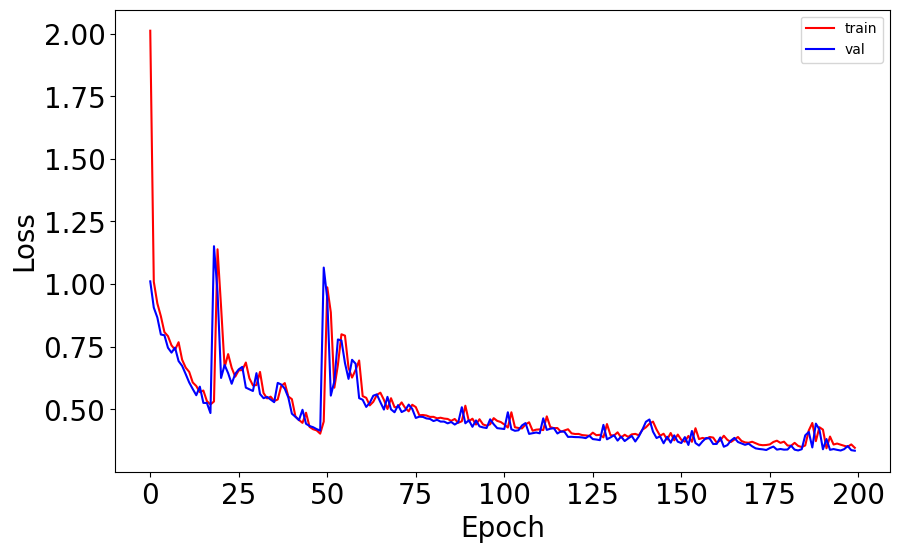

In [35]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [36]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 67ms/step


In [37]:
Y_pred

array([[8.2506563e-07, 8.3449686e-01, 1.6550234e-01],
       [9.5696503e-01, 4.2991720e-02, 4.3211359e-05],
       [4.5987738e-22, 7.7202311e-04, 9.9922800e-01],
       [2.9497886e-07, 7.8827381e-01, 2.1172594e-01],
       [5.9903300e-07, 8.2097983e-01, 1.7901954e-01],
       [9.5696503e-01, 4.2991720e-02, 4.3211359e-05],
       [4.4693109e-03, 9.8154289e-01, 1.3987811e-02],
       [4.2187742e-12, 1.5876453e-01, 8.4123546e-01],
       [6.9758173e-09, 5.6243443e-01, 4.3756554e-01],
       [4.3436344e-04, 9.7101384e-01, 2.8551858e-02],
       [6.2266657e-11, 2.7027646e-01, 7.2972351e-01],
       [9.5696503e-01, 4.2991720e-02, 4.3211359e-05],
       [9.5696503e-01, 4.2991720e-02, 4.3211359e-05],
       [9.5696503e-01, 4.2991720e-02, 4.3211359e-05],
       [9.5696503e-01, 4.2991720e-02, 4.3211359e-05],
       [5.3898361e-07, 8.1634724e-01, 1.8365221e-01],
       [1.2572132e-16, 1.5006782e-02, 9.8499322e-01],
       [1.6701920e-04, 9.6183199e-01, 3.8001005e-02],
       [4.0871339e-07, 8.038

In [38]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [39]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [40]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [41]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')  #average='weighted' se agrega si hay varias clases 
reca_train = recall_score(y_train, Y_pred,average='weighted') # aqui igual, si no marcara error


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 79ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000
